# 1.Conociendo los datos
Este apartado explica el tipo de datos con los que se ha realizado el estudio.

Principalmente nos encontramos con 7 columnas de datos numéricos (year, suicides_no, population, suicides/100k pop, HDI for year, gdp_per_capita y gdp_for _year), de las cuales únicamente hay que tratar gdp_for_year ya que utiliza comas en lugar de puntos como separador. Las 5 columnas restantes contienen valores categóricos que han de ser convertidos.
Cada fila del dataset, por lo tanto, tiene :
* Country: una celda donde dice el país que hace referencia la fila.
* Year: año donde se situa la fila(),
* Sex: el sexo del grupo de personas que han cometido el suicidio.
* Age: rango de edad de las personas
* Suicides_no: el numero de suicidios de ese año().
* Population: población del país en ese año en concreto.
* Suicides/100k pop: la proporción de estos suicidios respecto a 100.000 habitantes del país.
* Country-year: celda que dice país y año junto.
* HDI for year: índice que refleja el desarrollo humano en el país. Tiene en cuenta esperanza de vida, educación e indicadores de ingreso per cápita.
* GDP_for_year: producto interior bruto del país, calculado anualmente, en dólares.
* Gdp_per_capita: producto interior bruto por persona. Es el resultado de dividir el gdp_for_year entre la suma de la población de cada rango de edad en un mismo año. 
* Generation: la generación a la que pertenecen según el año en que nacieron. Cada generación tiene unos hechos históricos y características adjudicados.

Las filas están separadas según el rango de edad y el sexo, por lo tanto el año de cada país se repite un total de 12 veces porque hay 6 rangos de edad y 2 sexos contemplados.


In [52]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from scipy import stats
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('suicide_rate.csv')
dataset.rename(columns={"gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(dataset.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita', 'generation'],
      dtype='object')


# 2.Pre-processing
En el dataset hay 12 columnas, de  las cuales vamos a utilizar 10. La razón explicada por partes es: 
-	Country-year es eliminada ya que esta columna es una combinación de las columnas country y year, que ya las tenemos por separado. Por lo tanto, la elimino para no tener una columna adicional que me aporte la misma información.
-	HDI for year nos aporta información que podría ser interesante, pero debido a la multitud de filas vacías, 19.456 de 27.820, he decidido eliminarla y no tenerla en cuenta.


In [53]:
dataset.drop(['HDI for year', 'country-year'], axis=1, inplace= True)

print(dataset.isnull().sum())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita        0
generation            0
dtype: int64


In [54]:
#Tractament de gdp_for_year
import re
gdp=[]
for num in data[:,7]:
    transformed=re.sub(",","", num)
    gdp.append(int(transformed))
gdp = np.array(gdp)
df = pd.DataFrame(gdp, columns=['gdp'])

Del resto de columnas hay que tratar 5. Comienzo por la columna gdp_for_year. En esta columna la única acción requerida es la eliminación de la coma en la puntuación de los miles del número, para que no sea interpretado como un string y pueda leerse como para lo que fue escrito, un int.

Vamos a ver un grafico de comparativo entre sexos en función de los años.

Utilizaremos one hot encoding para todas las variables categoricas que tenemos excepto con country, debido a que country tiene muchos valores únicos y nos podría causar múltiples problemas, sobre todo a nivel de performance, se utiliza un label encoder para proceder a la transformación de esta columna.

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_categorical = dataset[['sex', 'country', 'generation', 'age']]
#Sex encoding
sex_reshaped = np.array(df_categorical['sex']).reshape(-1, 1)
sex_values = ohe.fit_transform(sex_reshaped)
sex = pd.DataFrame(sex_values.toarray(), columns=['Female', 'Male'])
#Generation encoding
gen_reshaped = np.array(df_categorical['generation']).reshape(-1, 1)
gen_values = ohe.fit_transform(gen_reshaped)
gen = pd.DataFrame(gen_values.toarray(), columns=['Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z'])
#Age encoding
age_reshaped = np.array(df_categorical['age']).reshape(-1, 1)
age_values = ohe.fit_transform(age_reshaped)
age = pd.DataFrame(age_values.toarray(), columns=['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'])

df = df.join(sex)
df = df.join(gen)
df = df.join(age)
df['Male'] = df[['Male']].astype(int)
df['Female'] = df[['Female']].astype(int)
df['Generation X'] = df[['Generation X']].astype(int)
df['Silent'] = df[['Silent']].astype(int)
df['G.I. Generation'] = df[['G.I. Generation']].astype(int)
df['Boomers'] = df[['Boomers']].astype(int)
df['Millenials'] = df[['Millenials']].astype(int)
df['Generation Z'] = df[['Generation Z']].astype(int)
df['15-24 years'] = df[['15-24 years']].astype(int)
df['35-54 years'] = df[['35-54 years']].astype(int)
df['75+ years'] = df[['75+ years']].astype(int)
df['25-34 years'] = df[['25-34 years']].astype(int)
df['55-74 years'] = df[['55-74 years']].astype(int)
df['5-14 years'] = df[['5-14 years']].astype(int)

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Country encoding
le.fit(df_categorical['country'])
country_values = le.transform(df_categorical['country'])
country = pd.DataFrame(country_values, columns=['country'])
df = df.join(country)

df = df.join(dataset['year'])
df = df.join(dataset['suicides_no'])
df = df.join(dataset['population'])
df = df.join(dataset['suicides/100k pop'])
df = df.join(dataset['gdp_per_capita'])
df.describe()

,gdp,Female,Male,Generation X,Silent,G.I. Generation,Boomers,Millenials,Generation Z,15-24 years,...,75+ years,25-34 years,55-74 years,5-14 years,country,year,suicides_no,population,suicides/100k pop,gdp_per_capita
count,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,...,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000
mean,445580969025.727,0.500,0.500,0.179,0.099,0.230,0.053,0.210,0.229,0.167,...,0.167,0.166,0.167,0.167,49.275,2001.258,242.574,1844793.617,12.816,16866.464
std,1453609985940.916,0.500,0.500,0.384,0.298,0.421,0.224,0.407,0.420,0.373,...,0.373,0.372,0.373,0.373,29.373,8.469,902.048,3911779.442,18.962,18887.576
min,46919625.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1985.000,0.000,278.000,0.000,251.000
25%,8985352832.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,24.000,1995.000,3.000,97498.500,0.920,3447.000
50%,48114688201.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,47.000,2002.000,25.000,430150.000,5.990,9372.000
75%,260202429150.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,74.000,2008.000,131.000,1486143.250,16.620,24874.000
max,18120714000000.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,100.000,2016.000,22338.000,43805214.000,224.970,126352.000


Creo otro dataframe, debido a que me ha dado problemas en la etiqueta gdp_for_year ($) y no he sabido como eliminarla o acceder a ella mediante el nombre.

# Decisión del modelo y estudio de los datos
Comenzamos mirando la correlación que existe entre los datos con un mapa de calor.

<IPython.core.display.Javascript object>


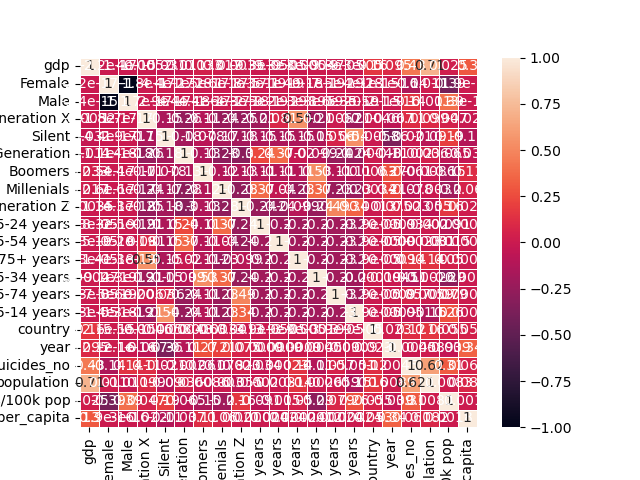

In [57]:

correlacio = df.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


Como podemos ver, no hay correlación entre los datos (a excepción de male y female). Donde parece haber correlación es entre gdp(gdp_for_year) y número de suicidios. 
En el resto de gràficos hemos visto, a parte que aún teniendo casos donde la edad y el sexo no afectan, hay otros en los que sí.

Comenzaremos mirando a ver que esta ocurriendo con la variable sex en detalle, ya que hay algo de correlación y la correlación de hombre y mujer son inversas.

<AxesSubplot:xlabel='age', ylabel='suicides/100k pop'>

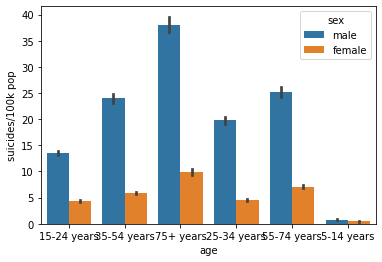

In [58]:
from IPython.display import display
%matplotlib inline
o1=sns.barplot(data=dataset, x='age', y='suicides/100k pop', hue='sex')
display(o1)

Se puede observar que, cuanto más avanzada es la edad, más probabilidad hay de suicidio. De hecho, en el caso de los hombres es de entre 2 a 4 veces más alta. Este es un hecho que miraremos más en detalle en el siguiente gráfico, ya que es un detalle interesante. De este gráfico sacamos en claro que la edad és un factor importante en la predicción.

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

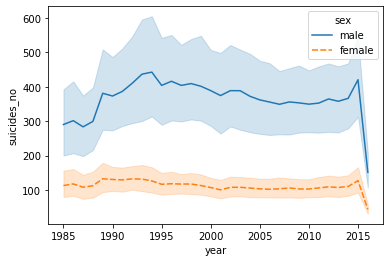

In [59]:
o2=sns.lineplot(data=dataset, x="year", y="suicides_no", hue="sex", style="sex")
display(o2)

En este gráfico se puede comprobar que en todos los casos el número de suicidios en hombres és entre el doble y cuatro veces respecto a las mujeres cada año, por lo tanto es una variable que nos interesa en nuestro modelo de predicción ya que si eres hombre esta claro que suben las probabilidades de suicidio comparandolo a si eres mujer.

El último factor que queda por observar es el producto bruto interior por capita para ver si la cantidad de dinero que gana cada persona afecta. Para esto miraremos los diez primeros paises con más suicidios, ya que será más claro con menos paises.

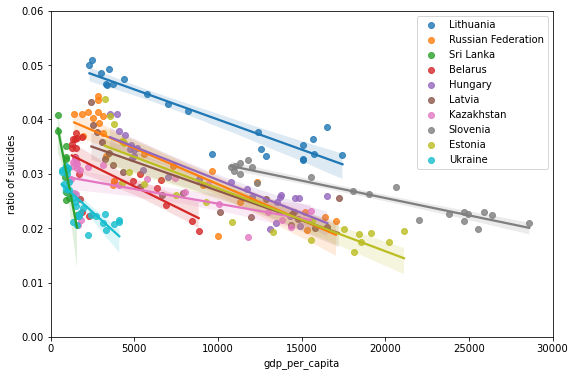

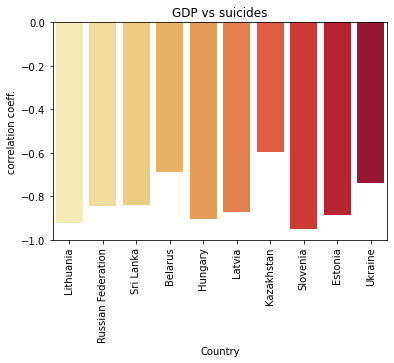

In [62]:
df_suino = dataset.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = dataset.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum

country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]
country_dict = dict()
for idx in range(len(country_list)):
    country_dict[country] = country_suicide[idx]
df_gdp = dataset.groupby(["country","year"]).gdp_per_capita.mean()

plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

En este último gráfico se puede ver como la correlación de estos 10 paises es inversamente proporcional y muy alta, lo que quiere decir que el gdp por habitante és un punto muy importante en algunos paises.

Para poder hacer una clasificación, que es el objetivo de esta práctica, necesitaremos una variable categórica que defina si hay una probabilidad alta de suicidio segun los datos que tenemos o no. 
Esta variable la crearemos a partir de la media de suicidios por cada 100k habitantes, ya que es más objetiva que la variable de número de suicidios porque tiene en cuenta la población. Por lo tanto ya no tendremos en cuenta: suicides_no, suicides/100k pop, population. Esto es debido a que teniendo esta variable categórica se convierte en información redundante, así como las variables creadas de generación porque teniendo la edad ya podemos intuir en que generación estan. Otra columna que ya no necesitamos es la de year, ya que son datos pasados y lo que queremos predecir es el futuro.

In [63]:
dataset['suicide_risk'] = 'low' 

dataset.loc[dataset['suicides/100k pop'] > dataset['suicides/100k pop'].mean(), 'suicide_risk'] = 'high' 
dataset['suicide_risk'].value_counts()

low     19061
high     8759
Name: suicide_risk, dtype: int64

In [64]:
print(df['suicides/100k pop'])
target_col = dataset['suicide_risk']
y = target_col.values
print(target_col)
df.drop(['suicides/100k pop'],axis=1, inplace= True)


0       6.710
1       5.190
2       4.830
3       4.590
4       3.280
         ... 
27815   2.960
27816   2.580
27817   2.170
27818   1.670
27819   1.460
Name: suicides/100k pop, Length: 27820, dtype: float64
0        low
1        low
2        low
3        low
4        low
        ... 
27815    low
27816    low
27817    low
27818    low
27819    low
Name: suicide_risk, Length: 27820, dtype: object


In [65]:
from sklearn import preprocessing
from sklearn import utils
input_col = df[['Male', 'Female', '15-24 years', '35-54 years', '75+ years',
              '25-34 years', '55-74 years', '5-14 years', 'gdp_per_capita', 
               'country']]

x = input_col.values
print(x)
#x = df.values
#x = x[:, [0,1,2,9,10,11,12,13,14,15,16]]

#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y)
#print(training_scores_encoded)
#print(utils.multiclass.type_of_target(y))
#print(utils.multiclass.type_of_target(y.astype('int')))
#print(utils.multiclass.type_of_target(training_scores_encoded))
#print(training_scores_encoded)

[[   1    0    1 ...    0  796    0]
 [   1    0    0 ...    0  796    0]
 [   0    1    1 ...    0  796    0]
 ...
 [   1    0    0 ...    0 2309  100]
 [   0    1    0 ...    0 2309  100]
 [   0    1    0 ...    0 2309  100]]


# Random forest VS KNN

Procedemos a dividir nuestro dataset, 20% test y de ahi sacaremos el validation. Al tener bastantes datos no creo necesario utilizar recursos para cross-validation.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Empezaré por utilizar el modelo random forest al ser un modelo bueno para clasificar y es rápido.  

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

Miro la precisión que tiene al entrenar y al validar.

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_pred = rf.predict(X_train)
print('training accuracy: ', accuracy_score(y_train, train_pred))

val_pred = rf.predict(X_val)
print('validation accuracy: ', accuracy_score(y_val, val_pred))

training accuracy:  0.9999400910615864
validation accuracy:  0.9063623292595255


La siguiente función servirá para utilizar diferentes métodos de random forest. Habran con 10, 100 y 500 arboles estimando por la función cuadrática y por función logarítmica.

In [19]:
def train_and_evaluate(X_train, train_target, X_val, val_target, **params):
    rf = RandomForestClassifier(n_jobs=-1, random_state=1, **params)
    rf.fit(X_train, train_target)
    train_pred = rf.predict(X_train)
    val_pred = rf.predict(X_val)
    train_error = 1 - accuracy_score(train_target, train_pred)
    val_error = 1 - accuracy_score(val_target, val_pred)
    return {'model': rf, **params, 'train_error': train_error, 'val_error': val_error}

In [20]:
errors_list = []

for n_estimators in [10, 100, 500]:
    for max_features in ['sqrt', 'log2']:
        outcome = train_and_evaluate(X_train, y_train, X_val, y_val, n_estimators=n_estimators, max_features=max_features)
        errors_list.append(outcome)

In [30]:
errors_df = pd.DataFrame(errors_list).sort_values(by='val_error')
errors_df


,model,n_estimators,max_features,train_error,val_error
4,"(DecisionTreeClassifier(max_features='sqrt', r...",500,sqrt,0.000,0.092
5,"(DecisionTreeClassifier(max_features='log2', r...",500,log2,0.000,0.092
2,"(DecisionTreeClassifier(max_features='sqrt', r...",100,sqrt,0.000,0.094
3,"(DecisionTreeClassifier(max_features='log2', r...",100,log2,0.000,0.094
0,"(DecisionTreeClassifier(max_features='sqrt', r...",10,sqrt,0.006,0.097
1,"(DecisionTreeClassifier(max_features='log2', r...",10,log2,0.006,0.097


El mejor random forest és el que tiene 500 estimadores y utiliza la función cuadrática, vamos a ver ahora la precisión que tiene esta predicción.

In [22]:
selected_rf = errors_df.iloc[4]['model']
test_pred = selected_rf.predict(X_test)
accuracy_score(y_test, test_pred)

0.9074406901509705

Ahora vamos utilizar otro algoritmo, KNN. Este algoritmo no era el principal que queria utilizar, querria utilizar otro de clasificación como es SVM, pero al ver que llevaba una hora de ejecución y no habia terminado lo he evitado.
Con KNN probaré con diferentes vecinos y compararé la precisión que tiene el mejor KNN con el mejor random forest.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.6906901509705248


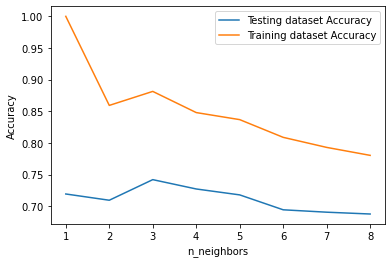

In [26]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Conclusiones
Random forest ha dado mejores resultados en esta comparativa, la mejor precisión que tiene KNN és por debajo del 0.75 contra el 0.9 de random forest. Realmente un 0.9 de precisión considero que es una muy buena precisión, a pesar de los datos con mala corelación y haber tenido que eliminar una variable tan, como considero, importante como es HDI ya que te explica el nivel de vida que hay en el país. Por otro lado, impacta ver la evolución de la cantidad de suicidios a medida que la gente es más mayor. Esto podria ser debido a que la gente mayor ha vivido epocas de guerra u otras consideraciones que no se tienen en cuenta en este dataset. 
Por último, una tendencia que no cambia es la del sexo. El sexo masculino tiene una clara tendencia al suicidio, compara con el sexo femenino.